# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [27]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
sns.set()

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


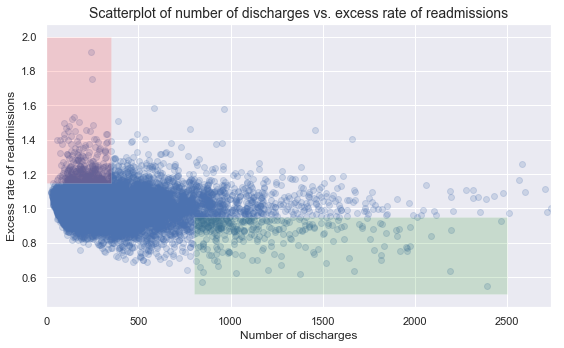

In [137]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
readm_ratio = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]
num_of_disch = clean_hospital_read_df['Number of Discharges'][81:-3]
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

There is not enough information provided in the analysis to make an accurate recommendation. There may be a trend in the data but we need to form a hypothesis first and then see if there is a "significant correlation" in the data. Statistics don't seem to cover all the ranges and are only reporting a ERR for hospitals with <100 readmissions and >1000. Analasis also does not look at the outliers and how many data points form each statistic. Furthermore, the recommenations for small facilities (<300) seems arbitrary and not based on any analysis that was performed. 

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

####    1. Setup an appropriate hypothesis test.

H0: There is no significant difference between excess rate of readmission (ERR) in small (<=100) and large (>100) hospitals.
Ha: There is a significant difference in ERR in small hostpitals vs large hospitals.

#### 2. Compute and report the observed significance value (or p-value).

In [ ]:
#first we'll split the data into large and small hospital size. Split will be based on number of discharges
#to be <=100 for small hospitals and >100 for large.

In [72]:
hospital = clean_hospital_read_df.copy()

In [88]:
hospital = hospital[['Number of Discharges','Excess Readmission Ratio']]

In [91]:
#drop the null values
hospital = hospital.dropna()

In [92]:
#split the data
large_hospital = hospital[hospital["Number of Discharges"] > 100]
small_hospital = hospital[hospital["Number of Discharges"] <= 100]

In [93]:
large_hospital.head()

,Number of Discharges,Excess Readmission Ratio
5092,101,1.0232
6788,101,0.9982
4351,101,1.0354
2837,101,1.0649
5417,101,1.0186


In [95]:
mue_small = np.mean(small_hospital['Excess Readmission Ratio'])
mue_large = np.mean(large_hospital['Excess Readmission Ratio'])
sigma_small = np.std(small_hospital['Excess Readmission Ratio'])
sigma_large = np.std(large_hospital['Excess Readmission Ratio'])

In [96]:
sample_normal_sm=np.random.normal(mue_small, sigma_small, size=100_000)
sample_normal_lg=np.random.normal(mue_large, sigma_large, size=100_000)

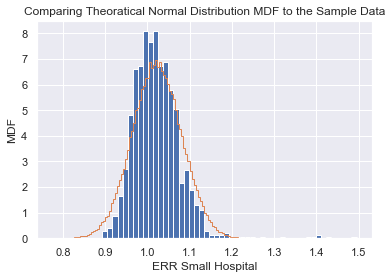

In [120]:
plt.hist(small_hospital['Excess Readmission Ratio'], density=True, bins=50)
plt.hist(sample_normal_sm, density=True, histtype='step', bins=100)
plt.xlabel('ERR Small Hospital')
plt.ylabel('MDF')
plt.title('Comparing Theoratical Normal Distribution MDF to the Sample Data')
plt.show()

It looks like the small hospital distribution is skewed to the right, we can look at the CDF to confirm

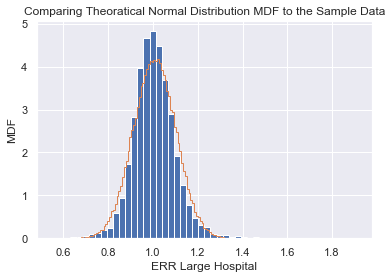

In [119]:
plt.hist(large_hospital['Excess Readmission Ratio'], density=True, bins=50)
plt.hist(sample_normal_lg, density=True, histtype='step', bins=100)
plt.xlabel('ERR Large Hospital')
plt.ylabel('MDF')
plt.title('Comparing Theoratical Normal Distribution MDF to the Sample Data')
plt.show()

In [100]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x, y

In [101]:
x_small, y_small = ecdf(small_hospital['Excess Readmission Ratio'])
x_theo_sm, y_theo_sm = ecdf(sample_normal_sm)
x_large, y_large = ecdf(large_hospital['Excess Readmission Ratio'])
x_theo_lg, y_theo_lg = ecdf(sample_normal_lg)

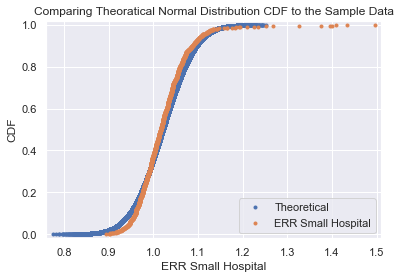

In [102]:
_ = plt.plot(x_theo_sm, y_theo_sm, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.legend(('Theoretical', 'ERR Small Hospital'), loc='lower right')
plt.xlabel('ERR Small Hospital')
plt.ylabel('CDF')
plt.title('Comparing Theoratical Normal Distribution CDF to the Sample Data')
plt.margins(0.02)
plt.show()

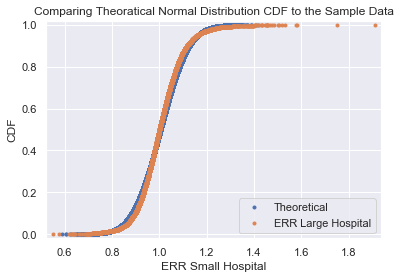

In [103]:
_ = plt.plot(x_theo_lg, y_theo_lg, marker='.', linestyle='none')
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.legend(('Theoretical', 'ERR Large Hospital'), loc='lower right')
plt.xlabel('ERR Small Hospital')
plt.ylabel('CDF')
plt.title('Comparing Theoratical Normal Distribution CDF to the Sample Data')
plt.margins(0.02)
plt.show()

Visually the data looks to have a normal distribution

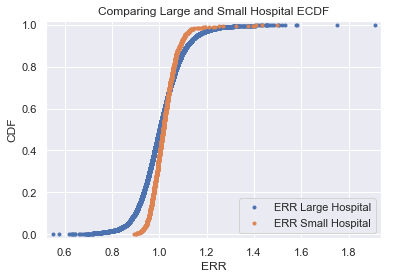

In [118]:
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.legend(('ERR Large Hospital', 'ERR Small Hospital'), loc='lower right')
plt.xlabel('ERR')
plt.ylabel('CDF')
plt.title('Comparing Large and Small Hospital ECDF')
plt.margins(0.02)
plt.show()

In [104]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [105]:
def permutation_sample(data_1, data_2):
    """Generate a permutation sample from two data sets"""
    data = np.concatenate((data_1, data_2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data_1)]
    perm_sample_2 = permuted_data[len(data_1):]
    
    return perm_sample_1, perm_sample_2

In [106]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generates multiple permutations replicates"""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

In [150]:
#Draw 100,000 permutation replicates
diff_means = diff_of_means(small_hospital['Excess Readmission Ratio'], large_hospital['Excess Readmission Ratio'])
perm_replicates = draw_perm_reps(small_hospital['Excess Readmission Ratio'], large_hospital['Excess Readmission Ratio'], diff_of_means, size=100_000)

In [151]:
max(abs(perm_replicates))

0.013397874358680006

In [152]:
p = np.sum(abs(perm_replicates) >= abs(diff_means)) / len(perm_replicates)
print(f'Observed difference in means: {diff_means}')
print(f'p-value: {p}')

Observed difference in means: 0.016320732987291198
p-value: 0.0


Out of 100,000 simulations we were not able to reproduce a difference of means larger than the observed difference of 0.16. As such we must reject our null hypothesis that there is no significant difference between ERR when it comes to hospital size.

####    3. Report statistical significance for $\alpha$ = .01. 

Since our p-value is less than 0.005 in a simulation of 100,000 we can say that the results are statistcally significant at the $\alpha$ = .01 level.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The basic difference between statistical significance and practical significance is that even though numbers may indicate a path towards a certain decision, in real life (practical) we may not be able to make that decision based on a number of other external variables. As in this hospital example, even though we have numerically proved that the excess readmission ratio (ERR) may not be the same for a smaller hospital vs a larger one, a person will most likely not have a choice of which hospital to go to especially for a serious event such as heart failure. Additionally, we cannot make a recommendation to the smaller hospitals to increase resources and therefore increase quality of care because we do not truly know why we have a statistical significance between the size of hospitals and ERR. This is first step in the investigation process. My recommendation would be to dive deeper into the operations of the hospitals to determine why there is a correlation between hospital size and ERR.

####    5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



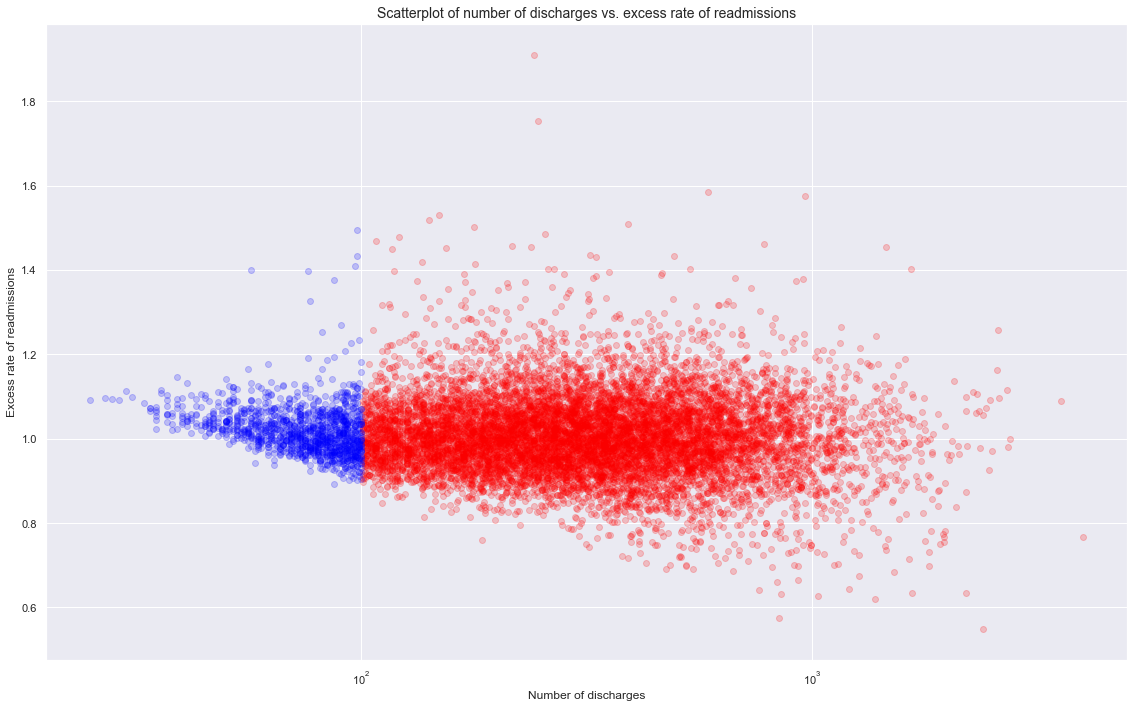

In [146]:
x_large = [a for a in large_hospital['Number of Discharges']]
y_large = list(large_hospital['Excess Readmission Ratio'])

x_small = [a for a in small_hospital['Number of Discharges']]
y_small = list(small_hospital['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x_large, y_large, alpha=0.2, color='red')
ax.scatter(x_small, y_small, alpha=0.2, color='blue')

ax.set_xlim([20, 5000])
ax.set_xscale('log')
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Advantages: In a scatter plot we can visually represent how the data may be correlated between two variables. We can also see all of the data points represented on one plot, and therefore see how it is clustered and any other trends.
Disadvantages: It is not as easy to see the trend with the given scale. A better representation may be to use a log scale to spread the points and better compare a very small hospital to a very large hospital.